
image 1/1 C:\Users\Maxim\OneDrive\Documents\03 University\02 Year5\01 Project\Visualisations\Images\Frame0.png: 448x640 1 person, 253.9ms
Speed: 46.0ms preprocess, 253.9ms inference, 6.0ms postprocess per image at shape (1, 3, 448, 640)


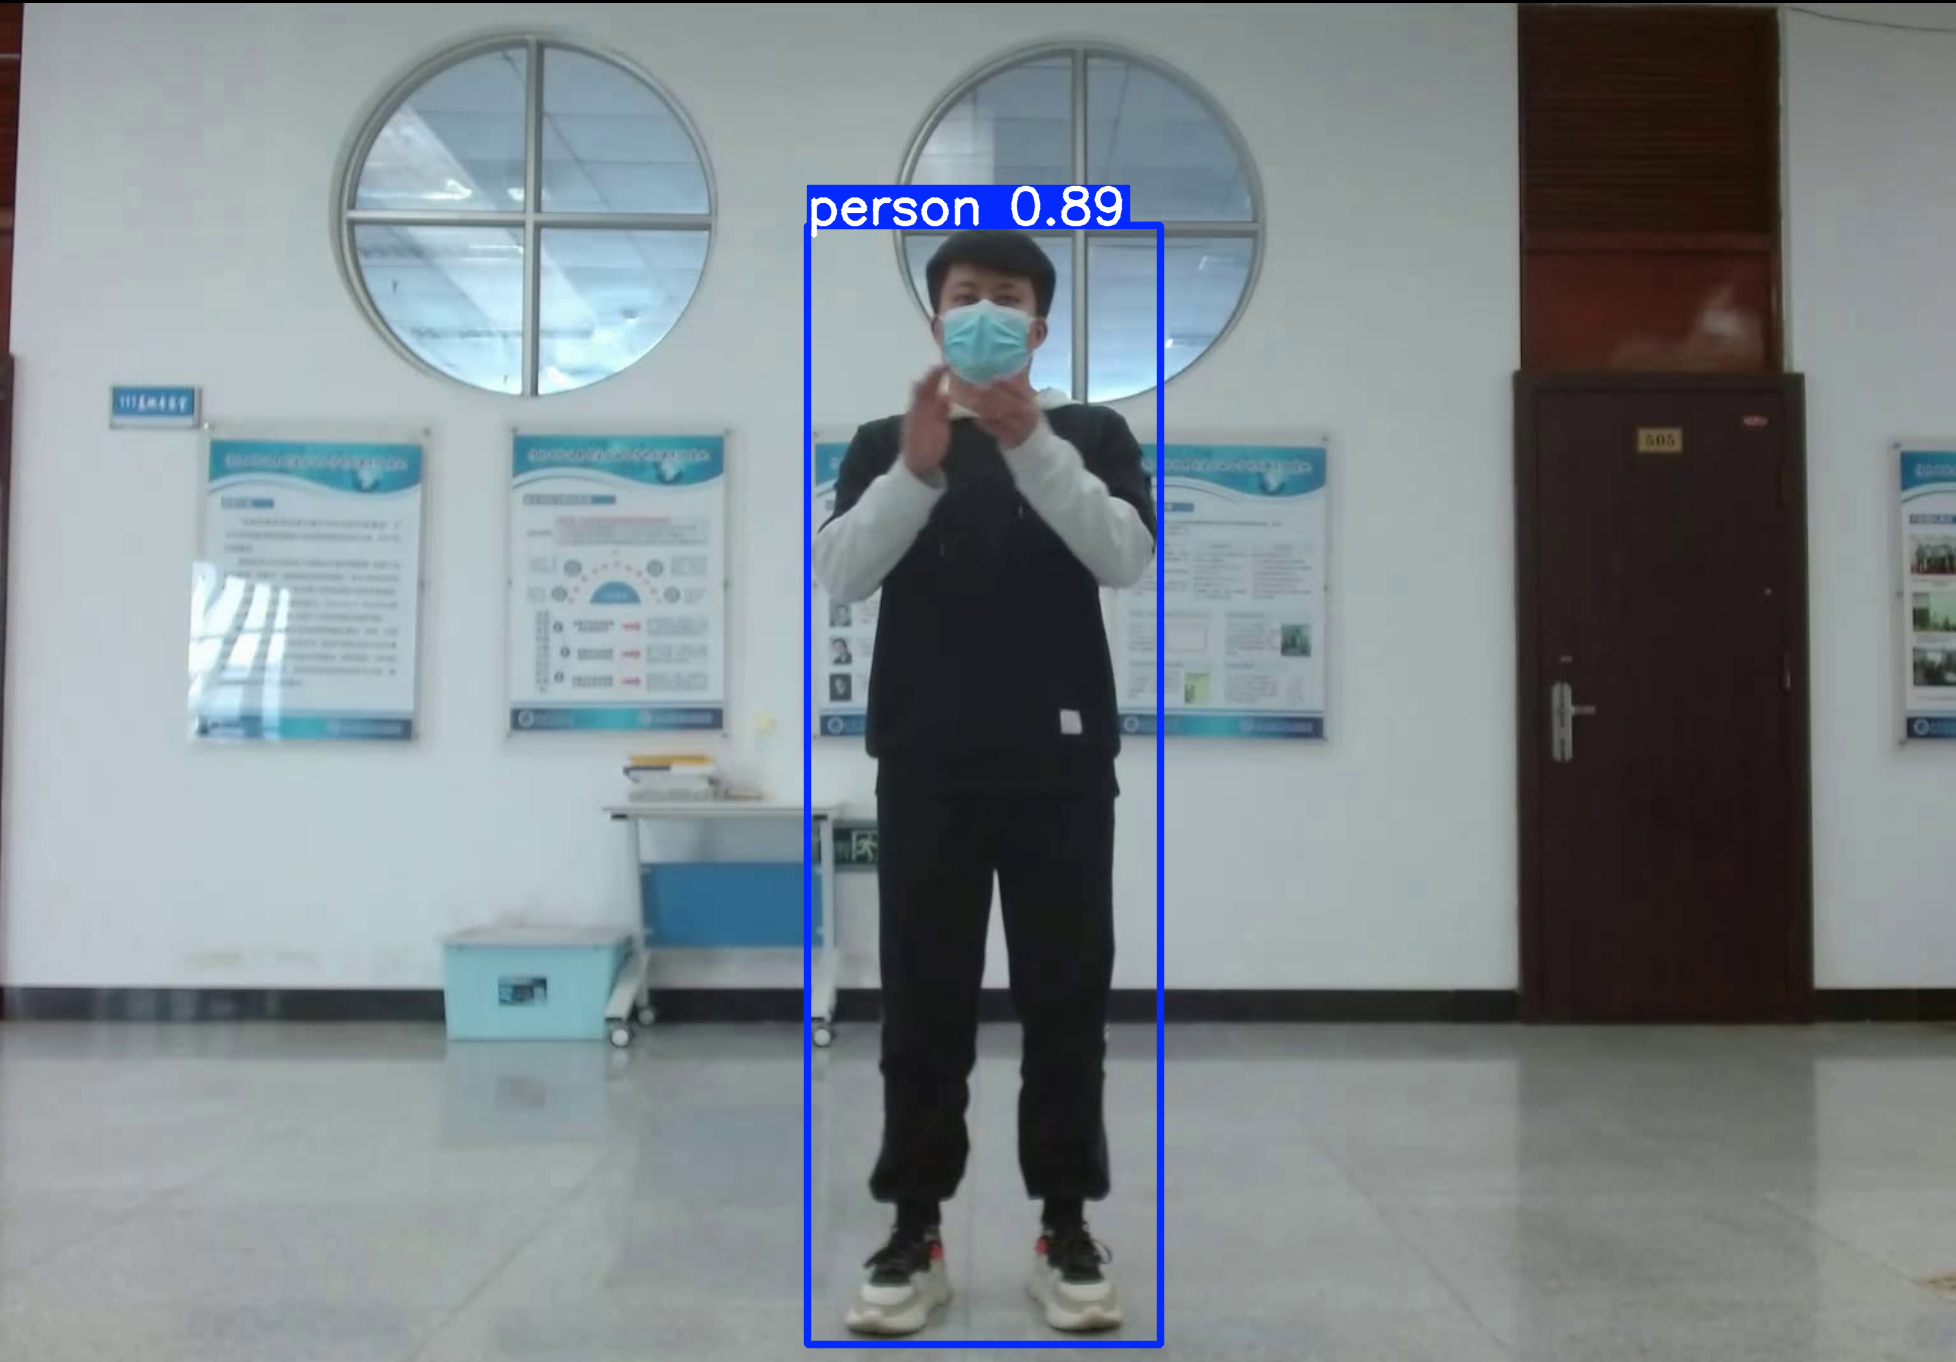

found one!


In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load an official model

# Predict with the model
# We can pass an array with paths to the videos later
results = model(r"C:\Users\Maxim\OneDrive\Documents\03 University\02 Year5\01 Project\Visualisations\Images\Frame0.png", classes = [0])  # predict only person objects on an image

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk
    for box in boxes:
        if box.conf > 0.8:
            print("found one!")

In [6]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('C:/Users/Maxim/Documents/03 University/04 Msci Project/AdaBins')

from models import UnetAdaptiveBins
import model_io
from PIL import Image

MIN_DEPTH = 1e-3
MAX_DEPTH_NYU = 10
MAX_DEPTH_KITTI = 80

N_BINS = 256 

# NYU
model = UnetAdaptiveBins.build(n_bins=N_BINS, min_val=MIN_DEPTH, max_val=MAX_DEPTH_NYU)
pretrained_path = "C:/Users/Maxim/Documents/03 University/04 Msci Project/AdaBins/pretrained/AdaBins_nyu.pt"
model, _, _ = model_io.load_checkpoint(pretrained_path, model)
print(model)

bin_edges, predicted_depth = model(example_rgb_batch)

Loading base model ()...

Using cache found in C:\Users\Maxim/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.
UnetAdaptiveBins(
  (encoder): Encoder(
    (original_model): GenEfficientNet(
      (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act1): SiLU(inplace=True)
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (bn1): BatchNorm2d(48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act1): SiLU(inplace=True)
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
              (act1): SiLU(inplace=True)
              (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            )
            (conv_pw): Con

NameError: name 'example_rgb_batch' is not defined

In [2]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('C:/Users/Maxim/Documents/03 University/04 Msci Project/AdaBins')

from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt


infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("https://ultralytics.com/images/bus.jpg")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

Loading base model ()...

Using cache found in C:\Users\Maxim/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


C:\Users\Maxim\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users/Maxim/Documents/03 University/04 Msci Project/AdaBins\model_io.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer 

AssertionError: Torch not compiled with CUDA enabled

In [3]:
import torch
print(torch.cuda.is_available())

False


## Testing for Human Region Indexing

In [7]:
from ultralytics import YOLO
import numpy as np

# Predict with the model
# We can pass an array with paths to the videos later





# Break down video into frames (using Vid2Image)
# For each frame predict using yolo, find humans with confidence of 0.7 or higher (as a starting point) (do this using an array of the frames of the video)
# For each frame i, find frame i - 1. Iterate through boxes, if their positions are 5-10% different in position then assmume they are the same human and add this 
# region to an array with index n where n is the index of the human in the scene. If it doesn't exist add a new array with index n+1.

# Perform depth estimation and mesh fitting on each indexed human (lets throw this all in a dictionary for ease of use)

def are_boxes_similar(box1_full,box2_full):
    print(comparing)
    # To determine the thesholds for similarity take a video with only 1 subject that is always in view e.g. the first midas vid
    # Determine the differences between each frame and find the mean, mode, maximum and minimum differences,
    # go kinda close to this.
    box1 = box1_full.xyxy[0]
    box2 = box2_full.xyxy[0]
    # Compute centroids of each box as x,y pairs
    box1_centroid = [(box1[0] + box1[2])/2,(box1[1]+box1[3])/2] 
    box2_centroid = [(box2[0] + box2[2])/2,(box2[1]+box2[3])/2] 
    boxes = [box1_centroid, box2_centroid]
    
    distance = np.root(np.linalg.norm(boxes))
    # Normalise distance based on resolution of the image
    x_diff = np.square(box1_centroid[0]/box1_full.orig_shape[0] - box2_centroid[0]/box2_full.orig_shape[0])
    y_diff = np.square(box1_centroid[1]/box1_full.orig_shape[1] - box2_centroid[1]/box2_full.orig_shape[1])
    total_diff = x_diff + y_diff
    print(total_diff)
    return total_diff
#     if total_diff < x:
#         return True
#     else:
#         return False
    
    
    





In [11]:
import os
import os.path as osp
import cv2
import subprocess
import glob
# Function borrowed from DynoBOA
def video_to_images(vid_file, img_folder=None, return_info=False):
    if img_folder is None:
        img_folder = osp.join('/tmp', osp.basename(vid_file).replace('.', '_'))

    os.makedirs(img_folder, exist_ok=True)

    command = ['ffmpeg',
               '-i', vid_file,
               '-f', 'image2',
               '-v', 'error',
               f'{img_folder}/%06d.png']
    print(f'Running \"{" ".join(command)}\"')
    subprocess.call(command)

    print(f'Images saved to \"{img_folder}\"')

    return img_folder

vid_dir = ""
for vid_file in glob.glob(f'{vid_dir}/*.mp4'):
    forename = osp.basename(vid_file)[:-4]
    video_to_images(vid_file, f'{vid_dir}/images/{forename}')


Running "ffmpeg -i C:/Users/Maxim/Documents/03 University/04 Msci Project/Midas/video_data\sample_video.mp4 -f image2 -v error C:/Users/Maxim/Documents/03 University/04 Msci Project/Midas/video_data/images/sample_video/%06d.png"


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [27]:
import os
from ultralytics import YOLO
from PIL import Image
import numpy as np
import torch




# Break down video into frames (using Vid2Image)
# For each frame predict using yolo, find humans with confidence of 0.7 or higher (as a starting point) (do this using an array of the frames of the video)
# For each frame i, find frame i - 1. Iterate through boxes, if their positions are 5-10% different in position then assmume they are the same human and add this 
# region to an array with index n where n is the index of the human in the scene. If it doesn't exist add a new array with index n+1.

# Perform depth estimation and mesh fitting on each indexed human (lets throw this all in a dictionary for ease of use)

def are_boxes_similar(box1_full,box2_full):
    print(comparing)
    # To determine the thesholds for similarity take a video with only 1 subject that is always in view e.g. the first midas vid
    # Determine the differences between each frame and find the mean, mode, maximum and minimum differences,
    # go kinda close to this.
    box1 = box1_full.xyxy[0]
    box2 = box2_full.xyxy[0]
    # Compute centroids of each box as x,y pairs
    box1_centroid = [(box1[0] + box1[2])/2,(box1[1]+box1[3])/2] 
    box2_centroid = [(box2[0] + box2[2])/2,(box2[1]+box2[3])/2] 
    boxes = [box1_centroid, box2_centroid]
    
    distance = np.linalg.norm(boxes[0]-boxes[1])
    # Normalise distance based on resolution of the image
    x_diff = np.square(box1_centroid[0]/box1_full.orig_shape[0] - box2_centroid[0]/box2_full.orig_shape[0])
    y_diff = np.square(box1_centroid[1]/box1_full.orig_shape[1] - box2_centroid[1]/box2_full.orig_shape[1])
    total_diff = x_diff + y_diff
    print(total_diff)
    return total_diff
#     if total_diff < x:
#         return True
#     else:
#         return False



# Load a model
model = YOLO("yolo11n.pt")  # load an official model


# Path to the folder containing the images
# image_folder = "path/to/your/image/folder"

# # Get all image paths
# frames = []
# for image_name in os.listdir(image_folder):
#     # Create the full path to the image file
#     image_path = os.path.join(image_folder, image_name)
#     # Append the path to the list if it's a file
#     if os.path.isfile(image_path):
#         frames.append(image_path)

frames = "https://ultralytics.com/images/bus.jpg"

results = model(frames, classes = [0])  # predict only person objects on an image
framesWithBoxes = []
# Process results list
for result in results:
    orignialImage = result.orig_img
    boxesInFrame = []
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    #result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

    # Check confidence rating of each box
    for box in boxes:
        if box.conf > 0.8:
            print("found one!")
            print(box.xyxy)
            x1 = int(box.xyxy[0][0])
            y1 = int(box.xyxy[0][1])
            x2 = int(box.xyxy[0][2])
            y2 = int(box.xyxy[0][3])
            croppedImage = orignialImage[y1:y2,x1:x2] 
            boxesInFrame.append([box,croppedImage]) 

    framesWithBoxes.append(boxesInFrame)

#   Iterate through each frame, compare each box to the boxes in the previous frame
#   if they are within tolerance of each other then assign to the same human index
#   if they are not (or its the first frame) add to a new index.
human_region_index = {}
human_index = 0
diffs = []
for i in range(len(framesWithBoxes)):
    if i == 0:
        for box,image in framesWithBoxes[i]:
            name = "human_" + str(human_index)
            human_region_index[name] = [[box,image]]
            human_index += 1
    else:
        currentFrame = framesWithBoxes[i]
        previous_frame = framesWithBoxes[i-1]
        # Check all boxes in each frame, if they are similar to a box in the previous frame add to that human.
        for j in range(len(currentFrame)):
            box = currentFrame[j][0]
            image = currentFrame[j][1]
            noneSimilar = True
            for key,value in human_region_index.items():
                diffs.append(are_boxes_similar(box,value[-1][0]))
                noneSimilar = False
                human_region_index[key].append([box,image])
#                 if are_boxes_similar(box,value[-1][0]):
#                     noneSimilar = False
#                     human_region_index[key].append([box,image])


            if noneSimilar == True:
                name = "human_" + str(human_index)
                human_region_index[name] = [[box,image]]
                human_index += 1
            #Compare with previous frame boxes



print(human_region_index)
if len(diffs) > 1:
    print(np.mean(diffs))
else:
    print("not enough values")

# humans = {human_1: [frame1box,frame2box,frame3box]}
# frame1 = [box1,box2 ...] -> [frame1boxes, frame2boxes] -> {human_1: [frame1box,frame1image],[frame2box,frame2image],[frame3box,frame3image]]}


# Need to crop the image when a box is found and just add that image instead. Then we can iterate through each human
# and save all their images into a folder.


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\Maxim\Documents\03 University\04 Msci Project\MastersProject\bus.jpg: 640x480 4 persons, 104.1ms
Speed: 3.0ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
found one!
tensor([[671.0172, 394.8331, 809.8098, 878.7125]])
found one!
tensor([[ 47.4047, 399.5651, 239.3007, 904.1950]])
found one!
tensor([[223.0590, 408.6887, 344.4676, 860.4358]])
{'human_0': [[ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8882])
data: tensor([[671.0172, 394.8331, 809.8098, 878.7125,   0.8882,   0.0000]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[740.4135, 636.7728, 138.7925, 483.8794]])
xywhn: tensor([[0.9141, 0.5896, 0.1713, 0.4480]])
xyxy: tensor([[671.0172, 394.8331, 809.8098, 878.7125]])
xyxyn: tensor([[0.8284, 0.3656, 0.9998, 0.8136]]), array([[[ 99,  91,  91],
        [ 94,  82,  82],
     

In [6]:
print(box.orig_shape[0])

1080


### Human reflection model

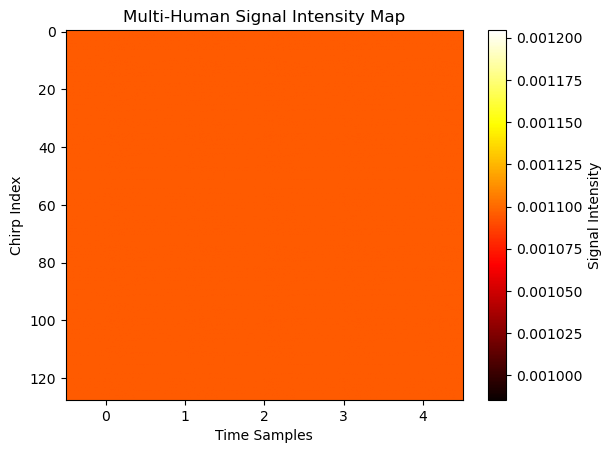

In [2]:
print(intensity_map)

[[ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
   0.00109502-1.21109281e-13j]
 [ 0.00109502+0.00000000e+00j -0.00109502+7.40774827e-14j
   0.00109502-3.39699163e-14j -0.00109502+1.34632123e-13j
  

In [31]:
image_name = "frame_" + str(i)
print(image_name)

frame_0


#### Version for threshold testing

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image
import numpy as np
import torch



# Break down video into frames (using Vid2Image)
# For each frame predict using yolo, find humans with confidence of 0.7 or higher (as a starting point) (do this using an array of the frames of the video)
# For each frame i, find frame i - 1. Iterate through boxes, if their positions are 5-10% different in position then assmume they are the same human and add this
# region to an array with index n where n is the index of the human in the scene. If it doesn't exist add a new array with index n+1.

# Perform depth estimation and mesh fitting on each indexed human (lets throw this all in a dictionary for ease of use)

def are_boxes_similar(box1_full,box2_full):
    # To determine the thesholds for similarity take a video with only 1 subject that is always in view e.g. the first midas vid
    # Determine the differences between each frame and find the mean, mode, maximum and minimum differences,
    # go kinda close to this.
    box1 = box1_full.xyxy[0]
    box1 = [box1[0].cpu().numpy(),box1[1].cpu().numpy(),box1[2].cpu().numpy(),box1[3].cpu().numpy()]
    box2 = box2_full.xyxy[0]
    box2 = [box2[0].cpu().numpy(),box2[1].cpu().numpy(),box2[2].cpu().numpy(),box2[3].cpu().numpy()]
    # Compute centroids of each box as x,y pairs
    box1_centroid = [(box1[0] + box1[2])/2,(box1[1]+box1[3])/2]
    box2_centroid = [(box2[0] + box2[2])/2,(box2[1]+box2[3])/2]
    #box1_centroid = box1_centroid.cpu().numpy() #if isinstance(box1_centroid, torch.Tensor) else box1_centroid
    #box2_centroid = box2_centroid.cpu().numpy() #if isinstance(box2_centroid, torch.Tensor) else box2_centroid
    print("box1 centroid = ", box1_centroid)
    print("box2 centroid = ", box2_centroid)
    boxes = np.array([box1_centroid, box2_centroid])
    distance = np.linalg.norm(boxes[0]-boxes[1])
    # Normalise distance based on resolution of the image
    x_diff = np.square(box1_centroid[0]/box1_full.orig_shape[0] - box2_centroid[0]/box2_full.orig_shape[0])
    y_diff = np.square(box1_centroid[1]/box1_full.orig_shape[1] - box2_centroid[1]/box2_full.orig_shape[1])
    total_diff = x_diff + y_diff
    print(total_diff)
    return total_diff
#     if total_diff < x:
#         return True
#     else:
#         return False



# Load a model
model = YOLO("/home/max/mastersProject/MastersProject/yolo11n.pt")  # load an official model


# Path to the folder containing the images
image_folder = "/home/max/Documents/images/sample_video"

# Get all image paths
frames = []
for image_name in os.listdir(image_folder):
    # Create the full path to the image file
    image_path = os.path.join(image_folder, image_name)
    # Append the path to the list if it's a file
    if os.path.isfile(image_path):
        frames.append(image_path)

#frames = "https://ultralytics.com/images/bus.jpg"

results = model(frames, classes = [0])  # predict only person objects on an image
framesWithBoxes = []
# Process results list
for result in results:
    orignialImage = result.orig_img
    boxesInFrame = []
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    #result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

    # Check confidence rating of each box
    for box in boxes:
        if box.conf > 0.8:
            print("found one!")
            print(box.xyxy)
            x1 = int(box.xyxy[0][0])
            y1 = int(box.xyxy[0][1])
            x2 = int(box.xyxy[0][2])
            y2 = int(box.xyxy[0][3])
            croppedImage = orignialImage[y1:y2,x1:x2]
            boxesInFrame.append([box,croppedImage])

    framesWithBoxes.append(boxesInFrame)

#   Iterate through each frame, compare each box to the boxes in the previous frame
#   if they are within tolerance of each other then assign to the same human index
#   if they are not (or its the first frame) add to a new index.
human_region_index = {}
human_index = 0
diffs = []
for i in range(len(framesWithBoxes)):
    if i == 0:
        for box,image in framesWithBoxes[i]:
            name = "human_" + str(human_index)
            human_region_index[name] = [[box,image]]
            human_index += 1
    else:
        currentFrame = framesWithBoxes[i]
        previous_frame = framesWithBoxes[i-1]
        # Check all boxes in each frame, if they are similar to a box in the previous frame add to that human.
        for j in range(len(currentFrame)):
            box = currentFrame[j][0]
            image = currentFrame[j][1]
            noneSimilar = True
            for key,value in human_region_index.items():
                diffs.append(are_boxes_similar(box,value[-1][0]))
                noneSimilar = False
                human_region_index[key].append([box,image])
#                 if are_boxes_similar(box,value[-1][0]):
#                     noneSimilar = False
#                     human_region_index[key].append([box,image])


            if noneSimilar == True:
                name = "human_" + str(human_index)
                human_region_index[name] = [[box,image]]
                human_index += 1
            #Compare with previous frame boxes



#print(human_region_index)
if len(diffs) > 1:
    print("mean difference = ", np.mean(diffs))
    print("max difference = ", np.max(diffs))
else:
    print("not enough values")

# humans = {human_1: [frame1box,frame2box,frame3box]}
# frame1 = [box1,box2 ...] -> [frame1boxes, frame2boxes] -> {human_1: [frame1box,frame1image],[frame2box,frame2image],[frame3box,frame3image]]}


# Need to crop the image when a box is found and just add that image instead. Then we can iterate through each human
# and save all their images into a folder.

In [29]:
### Final version

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image
import numpy as np
import torch



# Break down video into frames (using Vid2Image)
# For each frame predict using yolo, find humans with confidence of 0.7 or higher (as a starting point) (do this using an array of the frames of the video)
# For each frame i, find frame i - 1. Iterate through boxes, if their positions are 5-10% different in position then assmume they are the same human and add this
# region to an array with index n where n is the index of the human in the scene. If it doesn't exist add a new array with index n+1.

# Perform depth estimation and mesh fitting on each indexed human (lets throw this all in a dictionary for ease of use)

def are_boxes_similar(box1_full,box2_full):
    # To determine the thesholds for similarity take a video with only 1 subject that is always in view e.g. the first midas vid
    # Determine the differences between each frame and find the mean, mode, maximum and minimum differences,
    # go kinda close to this.
    box1 = box1_full.xyxy[0]
    box1 = [box1[0].cpu().numpy(),box1[1].cpu().numpy(),box1[2].cpu().numpy(),box1[3].cpu().numpy()]
    box2 = box2_full.xyxy[0]
    box2 = [box2[0].cpu().numpy(),box2[1].cpu().numpy(),box2[2].cpu().numpy(),box2[3].cpu().numpy()]
    # Compute centroids of each box as x,y pairs
    box1_centroid = [(box1[0] + box1[2])/2,(box1[1]+box1[3])/2]
    box2_centroid = [(box2[0] + box2[2])/2,(box2[1]+box2[3])/2]
    #box1_centroid = box1_centroid.cpu().numpy() #if isinstance(box1_centroid, torch.Tensor) else box1_centroid
    #box2_centroid = box2_centroid.cpu().numpy() #if isinstance(box2_centroid, torch.Tensor) else box2_centroid
    print("box1 centroid = ", box1_centroid)
    print("box2 centroid = ", box2_centroid)
    boxes = np.array([box1_centroid, box2_centroid])
    distance = np.linalg.norm(boxes[0]-boxes[1])
    # Normalise distance based on resolution of the image
    x_diff = np.square(box1_centroid[0]/box1_full.orig_shape[0] - box2_centroid[0]/box2_full.orig_shape[0])
    y_diff = np.square(box1_centroid[1]/box1_full.orig_shape[1] - box2_centroid[1]/box2_full.orig_shape[1])
    total_diff = x_diff + y_diff
    if total_diff < 0.005:
        return True
    else:
        return False
        print("frame rejected")



# Load a model
model = YOLO("/home/max/mastersProject/MastersProject/yolo11n.pt")  # load an official model


# Path to the folder containing the images
image_folder = "/home/max/Documents/images/sample_video"

# Get all image paths
frames = []
for image_name in os.listdir(image_folder):
    # Create the full path to the image file
    image_path = os.path.join(image_folder, image_name)
    # Append the path to the list if it's a file
    if os.path.isfile(image_path):
        frames.append(image_path)

#frames = "https://ultralytics.com/images/bus.jpg"

results = model(frames, classes = [0])  # predict only person objects on an image
framesWithBoxes = []
# Process results list
for result in results:
    orignialImage = result.orig_img
    boxesInFrame = []
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    #result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

    # Check confidence rating of each box
    for box in boxes:
        if box.conf > 0.8:
            print("found one!")
            print(box.xyxy)
            x1 = int(box.xyxy[0][0])
            y1 = int(box.xyxy[0][1])
            x2 = int(box.xyxy[0][2])
            y2 = int(box.xyxy[0][3])
            croppedImage = orignialImage[y1:y2,x1:x2]
            boxesInFrame.append([box,croppedImage])

    framesWithBoxes.append(boxesInFrame)

#   Iterate through each frame, compare each box to the boxes in the previous frame
#   if they are within tolerance of each other then assign to the same human index
#   if they are not (or its the first frame) add to a new index.
human_region_index = {}
human_index = 0
diffs = []
for i in range(len(framesWithBoxes)):
    if i == 0:
        for box,image in framesWithBoxes[i]:
            name = "human_" + str(human_index)
            human_region_index[name] = [[box,image]]
            human_index += 1
    else:
        currentFrame = framesWithBoxes[i]
        previous_frame = framesWithBoxes[i-1]
        # Check all boxes in each frame, if they are similar to a box in the previous frame add to that human.
        for j in range(len(currentFrame)):
            box = currentFrame[j][0]
            image = currentFrame[j][1]
            noneSimilar = True
            for key,value in human_region_index.items():
                if are_boxes_similar(box,value[-1][0]):
                    noneSimilar = False
                    human_region_index[key].append([box,image])


            if noneSimilar == True:
                name = "human_" + str(human_index)
                human_region_index[name] = [[box,image]]
                human_index += 1

for key,value in human_region_index.items():
    # Create a new folder for the current key if it doesn't exist
    folder_path = os.path.join("output_folder", key)
    os.makedirs(folder_path, exist_ok=True)
    for i in range(value):
        image = value[i][1]
        image_name = "frame_" + str(i)
        # Convert the NumPy array to a Pillow Image
        pil_image = Image.fromarray(image)

        # Construct the save path
        save_path = os.path.join(folder_path, f"{image_name}.png")

        # Save the image as a PNG
        pil_image.save(save_path)
        
# humans = {human_1: [frame1box,frame2box,frame3box]}
# frame1 = [box1,box2 ...] -> [frame1boxes, frame2boxes] -> {human_1: [frame1box,frame1image],[frame2box,frame2image],[frame3box,frame3image]]}


# Need to crop the image when a box is found and just add that image instead. Then we can iterate through each human
# and save all their images into a folder.